In [1]:
IMG_WIDTH = 1400
IMG_HEIGHT = 1400
ROW_SLICE = slice(0, 1400)
COL_SLICE = slice(1000, None)

In [2]:
import os
import sys
import numpy as np
sys.path.append("../")
from matplotlib.image import imread
import matplotlib.pyplot as plt
import tensorflow as tf
from UNet import get_unet

Using TensorFlow backend.


In [3]:
data_dir = "/storage/yw18581/data/"
data_folder = os.path.join(data_dir, 'train_validation_test')
clean_dir = os.path.join(data_folder, 'clean_300')
trained_dir = os.path.join(data_dir, "trained_models")

In [4]:
def inference_step(network_model, test_data_generator, predict_steps):

    y_pred = list()

    for _ in tqdm(range(predict_steps)):
        X_batch, _ = next(test_data_generator)
        Y_batch_pred = network_model.predict_on_batch(X_batch)
        #print(Y_batch_pred.shape)
        y_pred.append(Y_batch_pred)
    y_pred = np.concatenate(y_pred, axis=0)

    return y_pred

In [5]:
CHECKPOINT_FOLDER_PATH = os.path.join(data_dir, 'trained_models')
TASK_NAME = 'UNet_retrain_new_data_clean_300'
TASK_FOLDER_PATH = os.path.join(CHECKPOINT_FOLDER_PATH, TASK_NAME)

In [6]:
def trained_model(epochs):
    TRAINING_WEIGHTS_FILEPATH=os.path.join(trained_dir, 'REPRODUCIBILITY_TEST_clean_300_trained_UNet_{}epochs.hdf5'.format(epochs))
    return TRAINING_WEIGHTS_FILEPATH

In [7]:
model_250 = get_unet()
model_250.load_weights(trained_model(250))

In [7]:
def import_test_data(d):
    indices = np.load(os.path.join(TASK_FOLDER_PATH, "train_val_test_indices_{}mm.npz".format(d)))
    Xy = np.load(os.path.join(clean_dir, "Xy_{}mm_clean_300.npz".format(d)))
    test_indices = indices["test"]
    X = Xy["x"]
    y = Xy["y"]
    return X[test_indices],y[test_indices]

In [9]:
X_10mm_test, y_10mm_test = import_test_data(10)

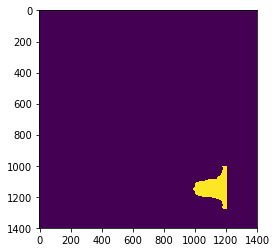

In [10]:
plt.imshow(y_10mm_test[0][...,0])

In [11]:
model_500 = get_unet()
model_500.load_weights(trained_model(500))

In [11]:
preds_250 = model_250.predict(X_10mm_test, batch_size=2)

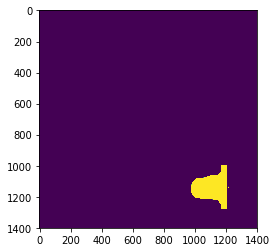

In [12]:
plt.imshow(preds_250[0][...,0])

In [13]:
model_500 = get_unet()
model_500.load_weights(trained_model(500))

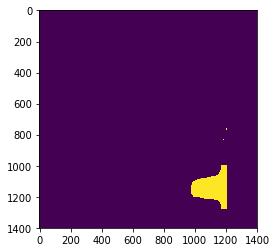

In [14]:
preds_500 = model_500.predict(X_10mm_test, batch_size=2)
plt.imshow(preds_500[0][...,0])

In [21]:
def test_and_plot(epcs):
    model = get_unet()
    model.load_weights(trained_model(epcs))
    preds = model.predict(X_10mm_test, batch_size=2)
    plt.imshow(preds[0][...,0])
    return(model, preds)

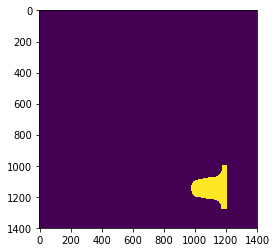

In [16]:
preds_600 = test_and_plot(600)

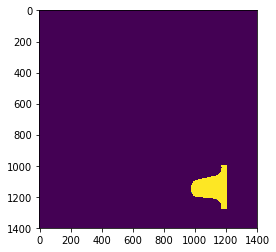

In [17]:
preds_700 = test_and_plot(700)

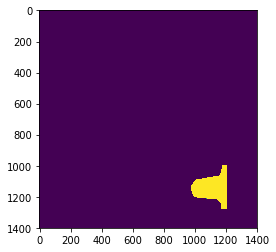

In [22]:
model_800, preds_800 = test_and_plot(800)

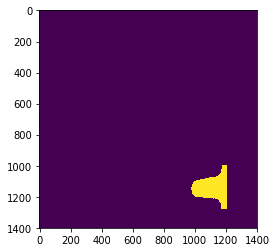

In [32]:
model_1000, preds_1000 = test_and_plot(1000)

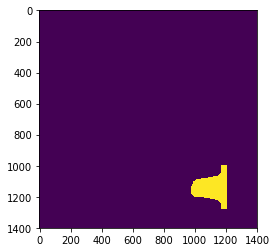

In [35]:
model_1500, preds_1500 = test_and_plot(1500)

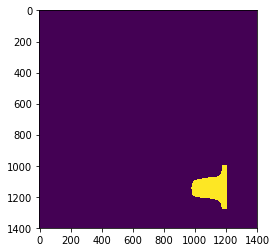

In [37]:
model_1600, preds_1600 = test_and_plot(1600)

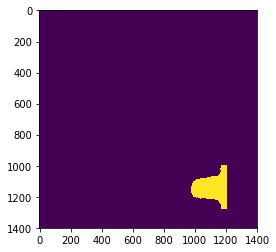

In [39]:
model_1700, preds_1700 = test_and_plot(1700)

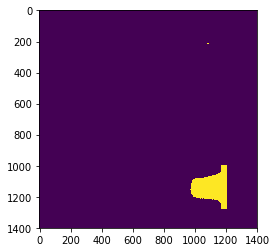

In [40]:
model_1800, preds_1800 = test_and_plot(1800)

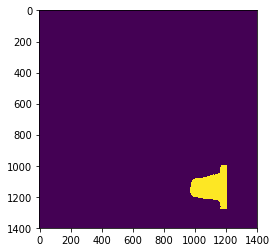

In [41]:
model_1900, preds_1900 = test_and_plot(1900)

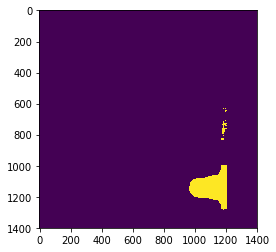

In [46]:
model_2000, preds_2000 = test_and_plot(2000)

In [24]:
img_four = imread("/storage/yw18581/data/File_0_four.tiff")[200:1600,COL_SLICE]

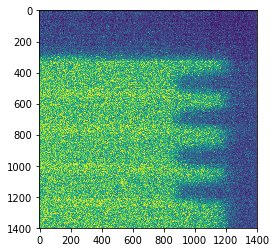

In [25]:
plt.imshow(img_four)

In [27]:
four_unet = model_800.predict(img_four[np.newaxis,...,np.newaxis])

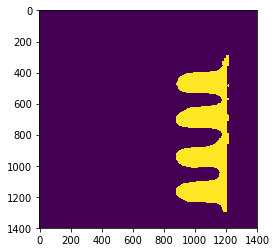

In [30]:
plt.imshow(four_unet[0,...,0])

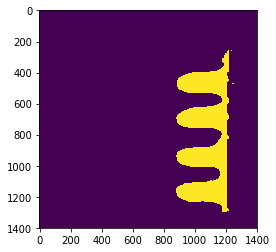

In [34]:
plt.imshow(model_1000.predict(img_four[np.newaxis, ..., np.newaxis])[0,...,0])

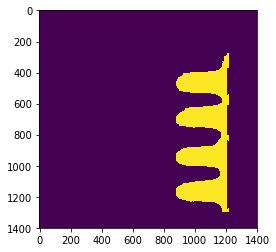

In [36]:
plt.imshow(model_1500.predict(img_four[np.newaxis, ..., np.newaxis])[0,...,0])

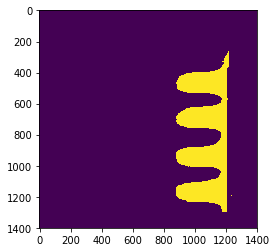

In [38]:
plt.imshow(model_1600.predict(img_four[np.newaxis, ..., np.newaxis])[0,...,0])

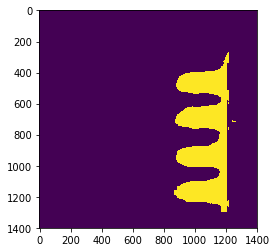

In [42]:
plt.imshow(model_1700.predict(img_four[np.newaxis, ..., np.newaxis])[0,...,0])

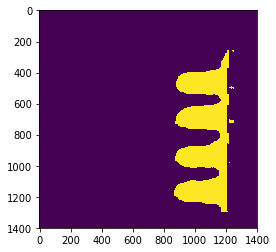

In [44]:
plt.imshow(model_1800.predict(img_four[np.newaxis, ..., np.newaxis])[0,...,0])

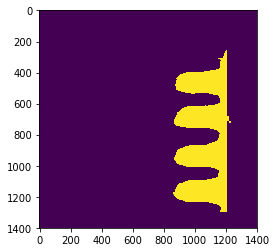

In [45]:
plt.imshow(model_1900.predict(img_four[np.newaxis, ..., np.newaxis])[0,...,0])

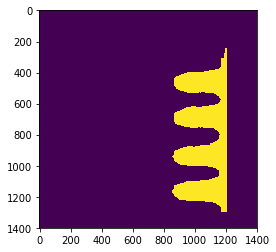

In [47]:
plt.imshow(model_2000.predict(img_four[np.newaxis, ..., np.newaxis])[0,...,0])

### test on different positions

In [11]:
X_test = np.load(os.path.join(data_folder, "Xy_test_clean_300_24_10_25.npz"))["x"]
y_test = np.load(os.path.join(data_folder, "Xy_test_clean_300_24_10_25.npz"))["y"]

In [12]:
model_1600 = get_unet()
model_1600.load_weights(trained_model(1600))

In [13]:
preds_test_1600 = model_1600.predict(X_test, batch_size=2, verbose = 1)

240/240 [==============================] - 25s 103ms/step


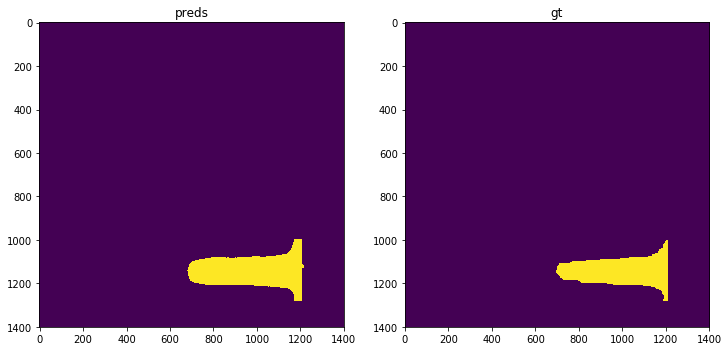

In [28]:
plt.figure(figsize=(12,10))
plt.subplot(1, 2, 1)

plt.imshow(preds_test_1600[1][...,0])
plt.title("preds")

plt.subplot(1, 2, 2)
plt.imshow(y_test[1][...,0])
plt.title("gt")
plt.show()

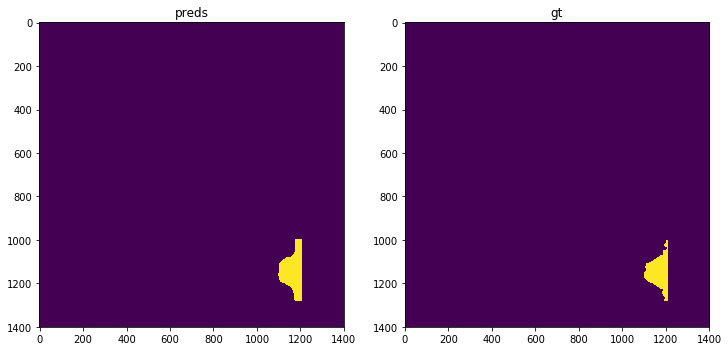

In [27]:
plt.figure(figsize=(12,10))
plt.subplot(1, 2, 1)

plt.imshow(preds_test_1600[2][...,0])
plt.title("preds")

plt.subplot(1, 2, 2)
plt.imshow(y_test[2][...,0])
plt.title("gt")
plt.show()

In [29]:
model_2000 = get_unet()
model_2000.load_weights(trained_model(2000))

preds_test_2000 = model_2000.predict(X_test, batch_size=2, verbose = 1)

240/240 [==============================] - 24s 101ms/step


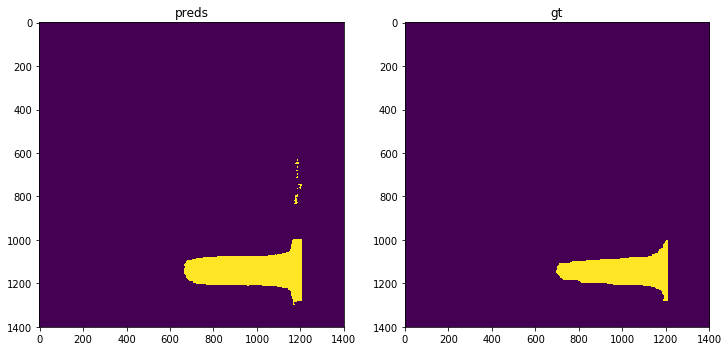

In [31]:
plt.figure(figsize=(12,10))
plt.subplot(1, 2, 1)

plt.imshow(preds_test_2000[1][...,0])
plt.title("preds")

plt.subplot(1, 2, 2)
plt.imshow(y_test[1][...,0])
plt.title("gt")
plt.show()

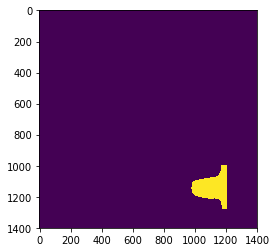

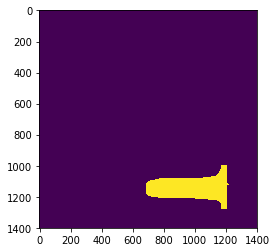

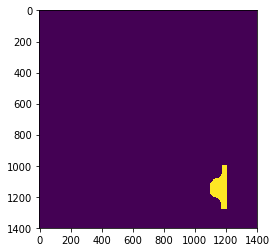

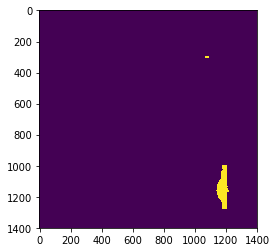

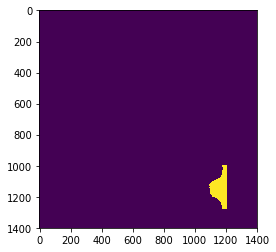

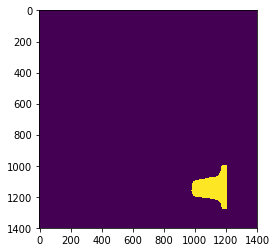

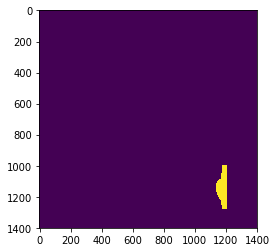

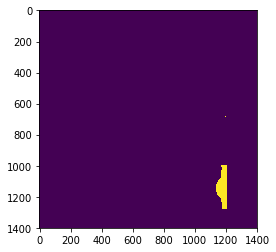

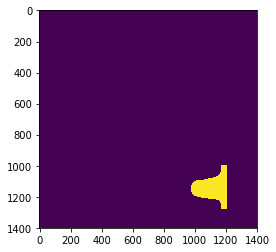

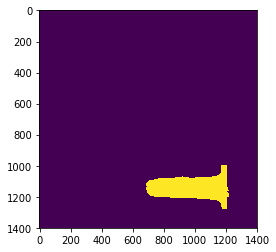

In [32]:
for i in range(10):
    plt.imshow(preds_test_1600[i][...,0])
    plt.show()

In [33]:
model_1500 = get_unet()
model_1500.load_weights(trained_model(1500))

preds_test_1500 = model_1500.predict(X_test, batch_size=2, verbose = 1)


240/240 [==============================] - 24s 102ms/step


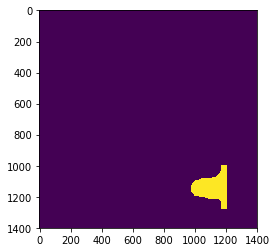

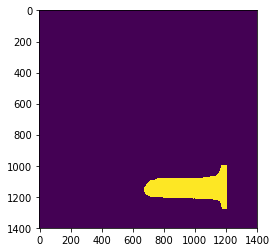

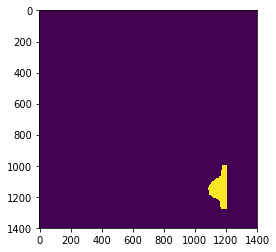

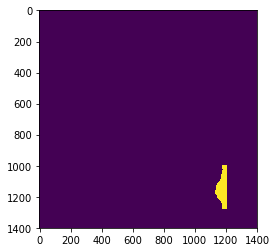

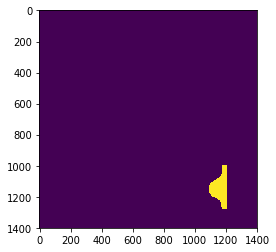

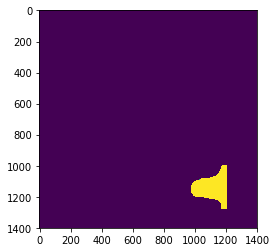

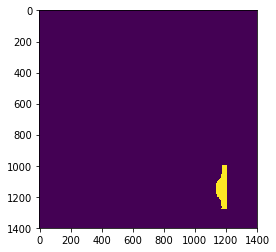

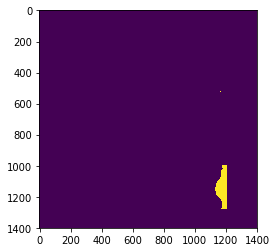

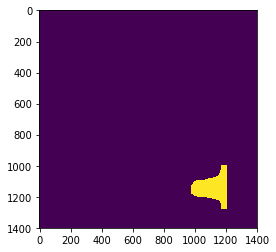

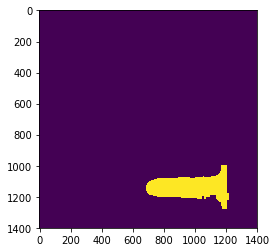

In [34]:
for i in range(10):
    plt.imshow(preds_test_1500[i][...,0])
    plt.show()

#### Export masks model 1600

In [36]:
folder = os.path.join(data_folder, "clean_300_june")

In [42]:
def run_predictions_and_save(model, fname_in, file_key):
    Xd = np.load(os.path.join(folder, fname_in))
    in_data = Xd["x"]
    pred = model.predict(in_data, batch_size=2, verbose = 1)
    pred = pred.astype(np.uint8)*255
    
    X_out =Xd['x'][...,0]
    dist_out = Xd['dist']
    np.savez_compressed(os.path.join(folder,"Xy_"+file_key+"_predicted_UNet_retrained_1600.npz"),
                   x= X_out, y=pred[...,0], dist = dist_out)
    return

In [53]:
run_predictions_and_save(model_1600, "Xy_1mm_clean300_june.npz", "1mm_clean_300_june")

300/300 [==============================] - 30s 100ms/step


In [54]:
run_predictions_and_save(model_1600, "Xy_2mm_clean300_june.npz", "2mm_clean_300_june")

300/300 [==============================] - 30s 101ms/step


In [55]:
run_predictions_and_save(model_1600, "Xy_3mm_clean300_june.npz", "3mm_clean_300_june")

300/300 [==============================] - 30s 101ms/step


In [56]:
run_predictions_and_save(model_1600, "Xy_4mm_clean300_june.npz", "4mm_clean_300_june")

300/300 [==============================] - 30s 101ms/step


In [57]:
run_predictions_and_save(model_1600, "Xy_10mm_clean300_june.npz", "10mm_clean_300_june")

300/300 [==============================] - 30s 101ms/step


In [58]:
run_predictions_and_save(model_1600, "Xy_15mm_clean300_june.npz", "15mm_clean_300_june")

300/300 [==============================] - 30s 101ms/step


In [59]:
run_predictions_and_save(model_1600, "Xy_20mm_clean300_june.npz", "20mm_clean_300_june")

300/300 [==============================] - 30s 101ms/step


In [60]:
run_predictions_and_save(model_1600, "Xy_25mm_clean300_june.npz", "25mm_clean_300_june")

300/300 [==============================] - 30s 101ms/step


In [61]:
run_predictions_and_save(model_1600, "Xy_30mm_clean300_june.npz", "30mm_clean_300_june")

300/300 [==============================] - 30s 101ms/step


In [62]:
run_predictions_and_save(model_1600, "Xy_35mm_clean300_june.npz", "35mm_clean_300_june")

300/300 [==============================] - 30s 101ms/step
